In [1]:
from data_processing import *
from train_touch import *
from train_trace import *
from visualization import plot_segment

In [2]:
data = Dataset("set1_imu.csv", "set1_tab.csv")
data.data_set.to_csv('data/data_frame.csv')  
data.data_set.head()

<class 'pandas.core.frame.DataFrame'>
merging the data sets...
calculate the quaternion representations...
calculate the rotation matrices...
calculate the navigation frame representation...
integrate the acceleration...


,host_timestamp,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature,x,...,r,nav_ax,nav_ay,nav_az,vel_x,vel_y,vel_z,pos_x,pos_y,pos_z
0,43375070723400,733964,-0.634824,0.466391,0.584305,-0.686517,0.11501,0.06939,20.29,-125.0,...,"[[-0.11382636407015201, 0.3750248547647836, -0...",-0.290393,0.418746,0.838008,0.000000,0.000000,0.000000,-125.000000,727.000000,0.000000
1,43375082694400,733975,-0.624188,0.485592,0.616692,-0.383517,0.17861,0.16839,20.29,-125.0,...,"[[0.40367173193477623, -0.9091483282409087, 0....",-0.630255,0.604797,0.492665,-5.063563,5.629486,7.318703,-152.849595,757.962173,40.252865
2,43375093727500,733986,-0.652059,0.487532,0.576429,-0.221017,0.29831,0.27589,20.29,-125.0,...,"[[-0.3519163621500252, 0.8038031677093032, 0.4...",0.897829,0.402963,0.163287,-3.591903,11.172164,10.926440,-200.454658,850.371246,140.601148
3,43375104950600,733998,-0.622237,0.512819,0.557383,0.168683,0.37521,0.49819,20.29,-125.0,...,"[[-0.4890386249033041, -0.825427834650935, 0.2...",0.038171,0.216470,0.955260,2.024098,14.888762,17.637719,-209.861488,1006.736800,311.986101
4,43375116785300,734009,-0.613073,0.566541,0.545624,0.397183,0.34961,0.54099,20.25,-125.0,...,"[[0.07391306177843293, 0.5203295300117495, 0.8...",0.713670,0.691190,-0.086401,6.159223,19.880890,22.416440,-164.853221,1197.969884,532.283972


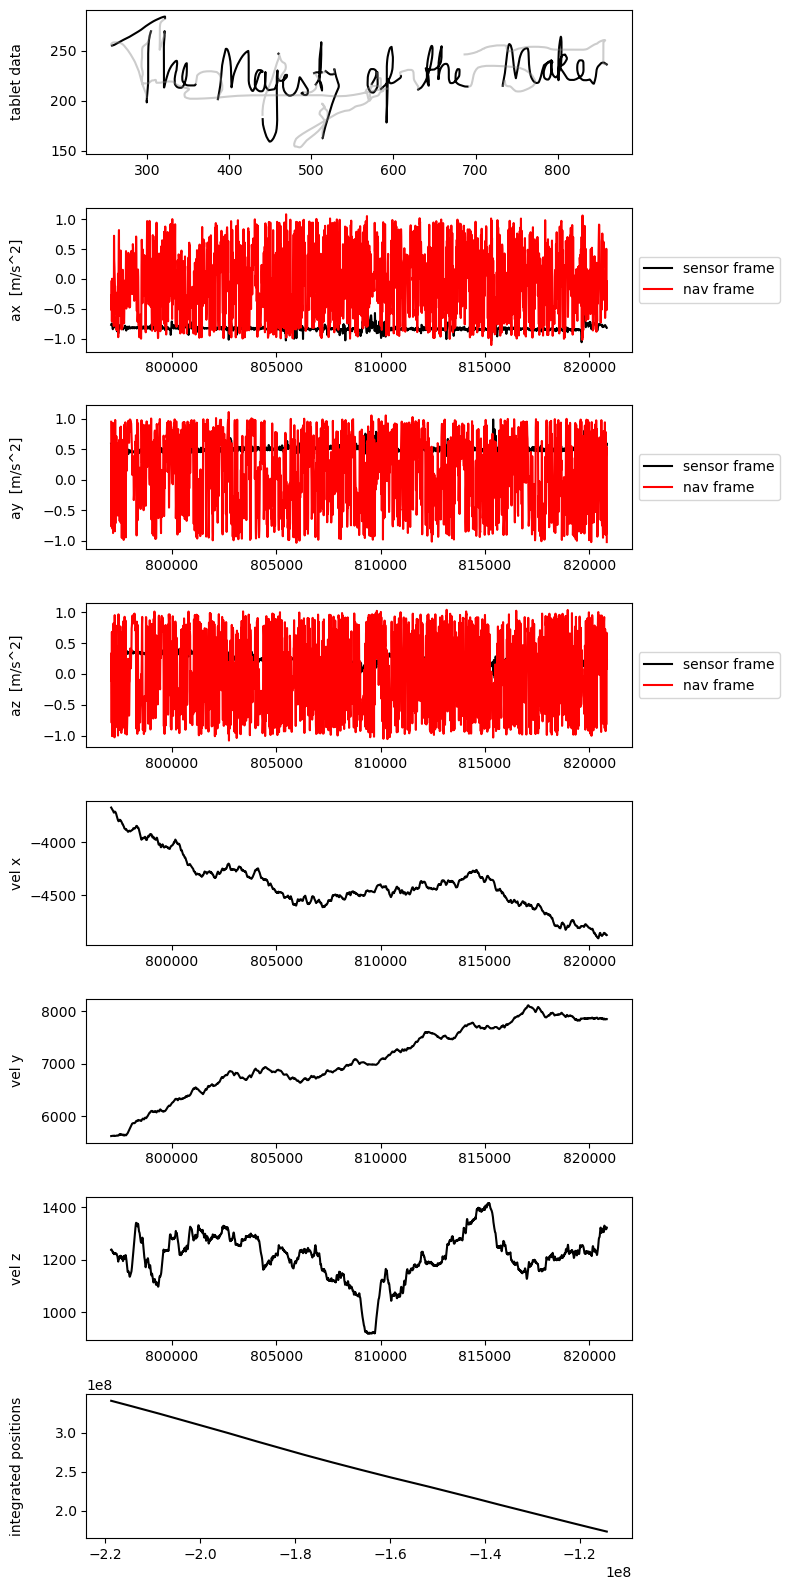

In [3]:
plot_segment(data.data_set, 3)

In [4]:
segment_3 = get_ith_segment(data.data_set, 3)

Split into test and trainings data...
Create segments and labels...
Create segments and labels...
Create the LSTM model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 5, 16)             0         
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 3)                 0         
                                                                 
Total params: 74,627
Trainable params: 74,627
Non-trainable params: 0
_________________________________________________________________
None
The trainings data is of shape (12027, 80) and (12027, 3

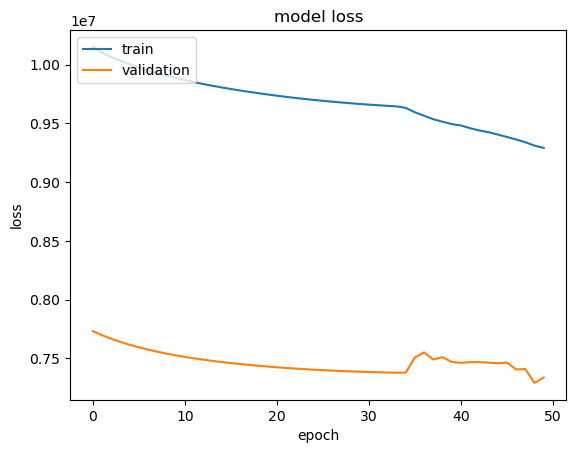

Use  model on test data...
94/94 [==============================] - 1s 3ms/step
First predictions for x:  [428.90598 472.4343  406.884   408.39005 426.3633 ]
First predictions for y:  [287.55154 304.72244 241.91151 270.61377 286.42502]


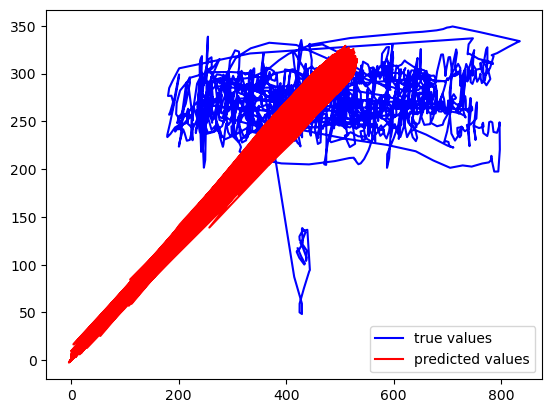

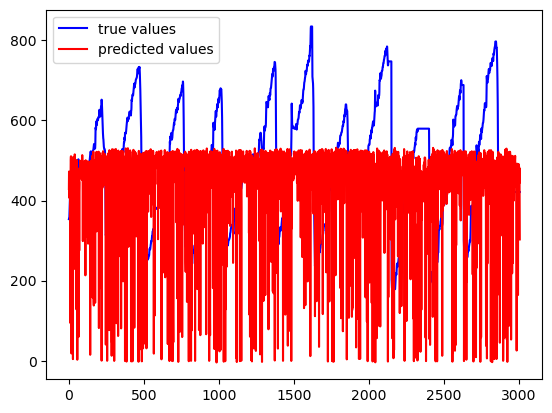

In [5]:
model = PredictionModelTrace(data.data_set)

Split into test and trainings data...
Create segments and labels...
Create segments and labels...
Create the LSTM model...


c:\Users\ann-k\Documents\uni\epfl\tracePrediction\tracePrediction\train_trace.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = pd.DataFrame(scaler.fit_transform(df[features].values), index=df.index)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 5, 16)             0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               74240     
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 3)                 0         
                                                                 
Total params: 74,627
Trainable params: 74,627
Non-trainable params: 0
_________________________________________________________________
None
The trainings data is of shape (337, 80) and (337, 3) and the test data is of shape (84, 80) and (84, 3)
Fitting model...
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50


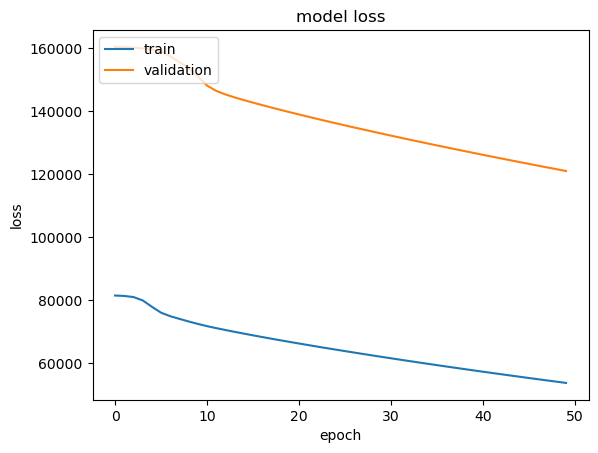

Use  model on test data...
3/3 [==============================] - 0s 4ms/step
First predictions for x:  [76.74262  76.51552  76.737656 76.86676  76.882935]
First predictions for y:  [61.539196 61.35747  61.531254 61.64108  61.659863]


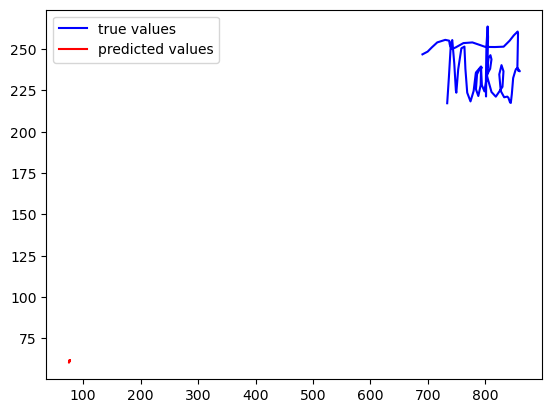

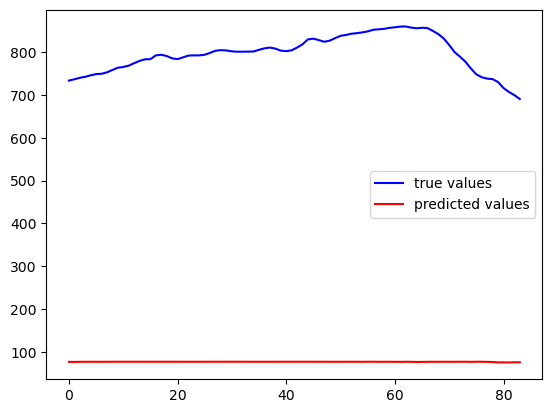

In [6]:
model = PredictionModelTrace(segment_3)